# El problema de las $k$-máquinas de dinero con retornos no estacionarios

La clase pasada vimos la estrategia $\epsilon$-greedy. ¿Pero qué pasa si el retorno que cada máquina de dinero da cambia aleatoriamente con el tiempo? ?Sigue siendo buena la estrategia?

## El problema

El dinero obtenido por la $i$-ésima máquina de dinero en el tiempo $t$ va a representarse como una variable aleatoria $X_{i,t} \sim N(\mu_{i,t}, \sigma_i)$. Ahora la media de cada máquina de dinero varía con el tiempo (la desviación estándar es constante por simplicidad).
Vamos a suponer que el retorno sigue una dinámica de caminata aleatoria. 
$$
    \mu_{i,t+1} = \mu_{i,t} + N(0,\eta)  
$$
con $\eta$ un número pequeño que representa un cambio aleatorio del cambio anterior. En este ejercicio

Vamos a ver que tal se desempeñan nuestros algoritmos $\epsilon$-greedy.

## Simulación de las máquinas

In [1]:
# valores iniciales 
k = 5 # numero de cubetas
mu = ones(k) # todas las cubetas comienzan en 1
srand(999999) # semilla
sigma = rand(k) # la desviacion es un numero aleatorio entre 0 y 1
eta = 0.1 # parametro de caminata aleatoria
# funcion que simula un juego y cambia las medias
using Distributions
function sim_game(machine_num) 
    global mu, sigma, eta
    reward = rand(Normal(mu[machine_num], sigma[machine_num]))
    mu += rand(Normal(0, eta), length(mu))
    return reward
end

sim_game (generic function with 1 method)

In [4]:
sim_game(4)

1.0245350180006763

In [5]:
mu

5-element Array{Float64,1}:
 0.876086
 1.03314 
 1.10136 
 0.6322  
 1.10412 

## Algoritmo $\epsilon$-greedy

In [100]:
function e_greedy(nsim, e)
    # numero de maquinas pasa como global
    global k
    # inititation & preallocation
    machine_average = zeros(k)
    greedy_choice = rand(1:k)
    total_earnings = zeros(nsim) # GUARDAREMOS TODOS POR PEDAGOGIA
    counts = zeros(k)
    # e-greedy iteration
    for i = 2:nsim
        u = rand() # numero aleatorio entre 0 y 1
        if u > e # be greedy
            machine_num = greedy_choice
        else # explore
            machine_num = rand(1:k)
        end
        counts[machine_num] += 1
        reward = sim_game(machine_num)
        machine_average[machine_num] += (reward - machine_average[machine_num])/counts[machine_num]      
        total_earnings[i] = total_earnings[i-1] + reward
        max, greedy_choice = findmax(machine_average)
    end
    return total_earnings
end

e_greedy (generic function with 1 method)

## Comparacion de distintas velocidades de exploracion

In [101]:
using DataFrames
nsim = 100
results = DataFrame()
e_values = [0, 0.01, 0.1, 0.25, 0.5] 
for e in e_values
    # reset the problem
    mu = ones(k)   
    srand(999999)
    # simulate
    earnings = e_greedy(nsim, e)
    results = vcat(results, DataFrame(
    sim = 1:nsim,
    e = repmat(["$e"], nsim),
    average_earnings = earnings./(1:nsim)
    ))
end
head(results)

,sim,e,average_earnings
1,1,0.0,0.0
2,2,0.0,0.6773037768334993
3,3,0.0,0.5686268273703295
4,4,0.0,0.6527965869567265
5,5,0.0,0.6323192657901656
6,6,0.0,0.7148243368374531


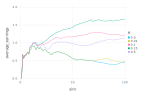

In [102]:
using Gadfly
plot(results, x = :sim, y = :average_earnings, color = :e, Geom.line)

# TD constante

In [119]:
function e_greedy2(nsim, e)
    # numero de maquinas pasa como global
    global k
    # inititation & preallocation
    machine_estimate = zeros(k)
    greedy_choice = rand(1:k)
    total_earnings = zeros(nsim) # GUARDAREMOS TODOS POR PEDAGOGIA
    counts = zeros(k)
    # e-greedy iteration
    for i = 2:nsim
        u = rand() # numero aleatorio entre 0 y 1
        if u > e # be greedy
            machine_num = greedy_choice
        else # explore
            machine_num = rand(1:k)
        end
        counts[machine_num] += 1
        reward = sim_game(machine_num)
        machine_estimate[machine_num] += 0.5*(reward - machine_estimate[machine_num])     
        total_earnings[i] = total_earnings[i-1] + reward
        max, greedy_choice = findmax(machine_estimate)
    end
    return total_earnings
end

e_greedy2 (generic function with 1 method)

In [120]:
using DataFrames
nsim = 1000
results = DataFrame()
e_values = [0, 0.01, 0.1, 0.25, 0.5] 
for e in e_values
    # reset the problem
    mu = ones(k)   
    srand(999999)
    # simulate
    earnings = e_greedy2(nsim, e)
    results = vcat(results, DataFrame(
    sim = 1:nsim,
    e = repmat(["$e"], nsim),
    average_earnings = earnings./(1:nsim)
    ))
end
head(results)

,sim,e,average_earnings
1,1,0.0,0.0
2,2,0.0,0.6773037768334993
3,3,0.0,0.5686268273703295
4,4,0.0,0.6527965869567265
5,5,0.0,0.6323192657901656
6,6,0.0,0.7148243368374531


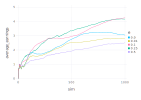

In [121]:
using Gadfly
plot(results, x = :sim, y = :average_earnings, color = :e, Geom.line)